In [1]:
# Import basic packages

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Iris flower data.csv')

In [3]:
df.head()

,studyName,Sample Number,Species,Island,Individual ID,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A1,11/11/2007,39.1,18.7,181,.,MALE,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A2,11/11/2007,39.5,17.4,186,3800,FEMALE,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A1,11/16/2007,40.3,18.0,.,3250,FEMALE,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A2,11/16/2007,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,N3A1,11/16/2007,36.7,19.3,193,3450,FEMALE,NaN


# Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
studyName              344 non-null object
Sample Number          344 non-null int64
Species                344 non-null object
Island                 344 non-null object
Individual ID          344 non-null object
Date Egg               344 non-null object
Culmen Length (mm)     342 non-null float64
Culmen Depth (mm)      342 non-null float64
Flipper Length (mm)    342 non-null object
Body Mass (g)          342 non-null object
Sex                    334 non-null object
Comments               26 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 32.4+ KB


In [5]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Island', 'Individual ID',
       'Date Egg', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Comments'],
      dtype='object')

In [6]:
# Drop the columns which are not significant
df=df.drop(['studyName','Sample Number','Individual ID','Date Egg','Comments'],axis=1)

In [7]:
df

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181,.,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,.,3250,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193,3450,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo penguin (Pygoscelis papua),Biscoe,46.8,14.3,215,4850,FEMALE
341,Gentoo penguin (Pygoscelis papua),Biscoe,50.4,15.7,222,5750,MALE
342,Gentoo penguin (Pygoscelis papua),Biscoe,45.2,14.8,212,5200,FEMALE


#### Missing Values

In [8]:
df.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64

There a '.' as value in flipper length column thats why the datatype is mentioned as object

In [9]:
# replace '.' with nan value
df['Flipper Length (mm)']=np.where(df['Flipper Length (mm)']=='.',np.nan,df['Flipper Length (mm)'])

In [10]:
df['Flipper Length (mm)'].value_counts()

190    22
195    16
187    16
193    15
210    14
191    13
215    12
197    10
196    10
185     9
198     8
216     8
220     8
208     8
189     7
184     7
192     7
230     7
212     7
186     7
181     7
213     6
199     6
222     6
214     6
217     6
201     6
188     6
203     5
209     5
221     5
180     5
218     5
194     5
219     5
178     4
200     4
225     4
202     4
228     4
205     3
224     3
182     3
207     2
223     2
183     2
211     2
229     2
172     1
179     1
174     1
226     1
231     1
176     1
206     1
Name: Flipper Length (mm), dtype: int64

There a '.' as value in body mass column thats why the datatype is mentioned as object

In [11]:
df['Body Mass (g)'].value_counts

<bound method IndexOpsMixin.value_counts of 0         .
1      3800
2      3250
3       NaN
4      3450
       ... 
339     NaN
340    4850
341    5750
342    5200
343    5400
Name: Body Mass (g), Length: 344, dtype: object>

In [12]:
# replace '.' with nan value
df['Body Mass (g)']=np.where(df['Body Mass (g)']=='.',np.nan,df['Body Mass (g)'])

In [13]:
df['Body Mass (g)'].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1      3800
2      3250
3       NaN
4      3450
       ... 
339     NaN
340    4850
341    5750
342    5200
343    5400
Name: Body Mass (g), Length: 344, dtype: object>

In [14]:
df['Flipper Length (mm)']=pd.to_numeric(df['Flipper Length (mm)'])

In [15]:
df['Body Mass (g)']=pd.to_numeric(df['Body Mass (g)'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
Species                344 non-null object
Island                 344 non-null object
Culmen Length (mm)     342 non-null float64
Culmen Depth (mm)      342 non-null float64
Flipper Length (mm)    341 non-null float64
Body Mass (g)          341 non-null float64
Sex                    334 non-null object
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


#### Outlier

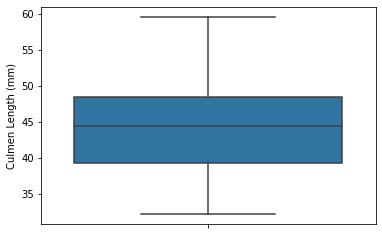

In [17]:
sns.boxplot(y='Culmen Length (mm)',data=df)

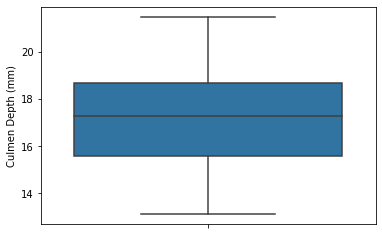

In [18]:
sns.boxplot(y='Culmen Depth (mm)',data=df)

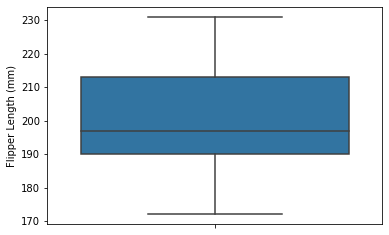

In [19]:
sns.boxplot(y='Flipper Length (mm)',data=df)

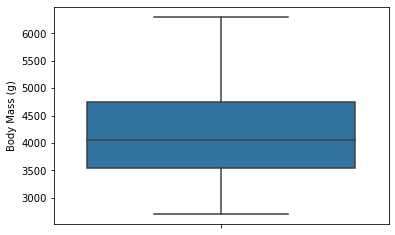

In [20]:
sns.boxplot(y='Body Mass (g)',data=df)

In [21]:
df.columns

Index(['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

In [23]:
# Filling missing values with mean value as there are no outliers
df['Culmen Length (mm)']=df['Culmen Length (mm)'].fillna(df['Culmen Length (mm)'].mean())
df['Culmen Depth (mm)']=df['Culmen Depth (mm)'].fillna(df['Culmen Depth (mm)'].mean())
df['Flipper Length (mm)']=df['Flipper Length (mm)'].fillna(df['Flipper Length (mm)'].mean())
df['Body Mass (g)']=df['Body Mass (g)'].fillna(df['Body Mass (g)'].mean())




In [24]:
df.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      0
Culmen Depth (mm)       0
Flipper Length (mm)     0
Body Mass (g)           0
Sex                    10
dtype: int64

In [26]:
df['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

In [27]:
# replacing '.' in sex column with mode i.e MALE 
df['Sex']=np.where(df['Sex']=='.','MALE',df['Sex'])

In [30]:
# Filling misisng value with mode i.e. MALE
df['Sex']=df['Sex'].fillna('MALE')

In [31]:
df.isnull().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [33]:
# Label encoding of Species column

df['Species']=df['Species'].astype('category')
df['Species']=df['Species'].cat.codes
df.head(20)

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0,Torgersen,39.10000,18.70000,181.000000,4203.079179,MALE
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,0,Torgersen,40.30000,18.00000,200.932551,3250.000000,FEMALE
3,0,Torgersen,43.92193,17.15117,200.932551,4203.079179,MALE
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
5,0,Torgersen,39.30000,20.60000,190.000000,3650.000000,MALE
6,0,Torgersen,38.90000,17.80000,181.000000,3625.000000,FEMALE
7,0,Torgersen,39.20000,19.60000,195.000000,4675.000000,MALE
8,0,Torgersen,34.10000,18.10000,193.000000,3475.000000,MALE
9,0,Torgersen,42.00000,20.20000,190.000000,4250.000000,MALE


In [34]:
# label encoding of Island & Sex
df['Island']=df['Island'].astype('category')
df['Island']=df['Island'].cat.codes

df['Sex']=df['Sex'].astype('category')
df['Sex']=df['Sex'].cat.codes

In [35]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0,2,39.10000,18.70000,181.000000,4203.079179,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,200.932551,3250.000000,0
3,0,2,43.92193,17.15117,200.932551,4203.079179,1
4,0,2,36.70000,19.30000,193.000000,3450.000000,0


In [37]:
 # get dummies for Island & Sex column

df=pd.get_dummies(df,columns=['Island','Sex'])

In [38]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_0,Island_1,Island_2,Sex_0,Sex_1
0,0,39.10000,18.70000,181.000000,4203.079179,0,0,1,0,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,0,1,1,0
2,0,40.30000,18.00000,200.932551,3250.000000,0,0,1,1,0
3,0,43.92193,17.15117,200.932551,4203.079179,0,0,1,0,1
4,0,36.70000,19.30000,193.000000,3450.000000,0,0,1,1,0


In [39]:
df=df.drop(['Island_0','Sex_0'],axis=1)

In [40]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_1,Island_2,Sex_1
0,0,39.10000,18.70000,181.000000,4203.079179,0,1,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,0,40.30000,18.00000,200.932551,3250.000000,0,1,0
3,0,43.92193,17.15117,200.932551,4203.079179,0,1,1
4,0,36.70000,19.30000,193.000000,3450.000000,0,1,0


Number of Male:  179
Number of Female:  165


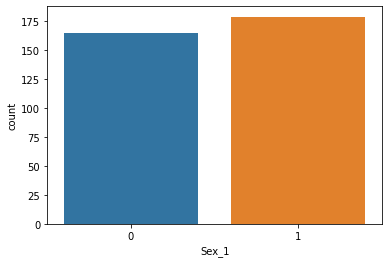

In [42]:
sns.countplot(data=df,x='Sex_1')
Male,Female=df['Sex_1'].value_counts()
print("Number of Male: ",Male)
print("Number of Female: ",Female)
plt.show()

A:  152
B:  124
C:  68


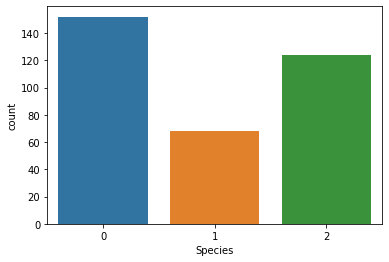

In [43]:
sns.countplot(data=df,x='Species')
A,B,C=df['Species'].value_counts()
print("A: ",A)
print("B: ",B)
print("C: ",C)
plt.show()

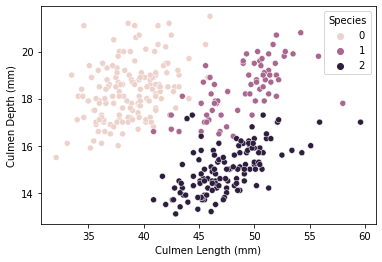

In [45]:
sns.scatterplot(x='Culmen Length (mm)',y='Culmen Depth (mm)',data=df,hue='Species')
plt.show()

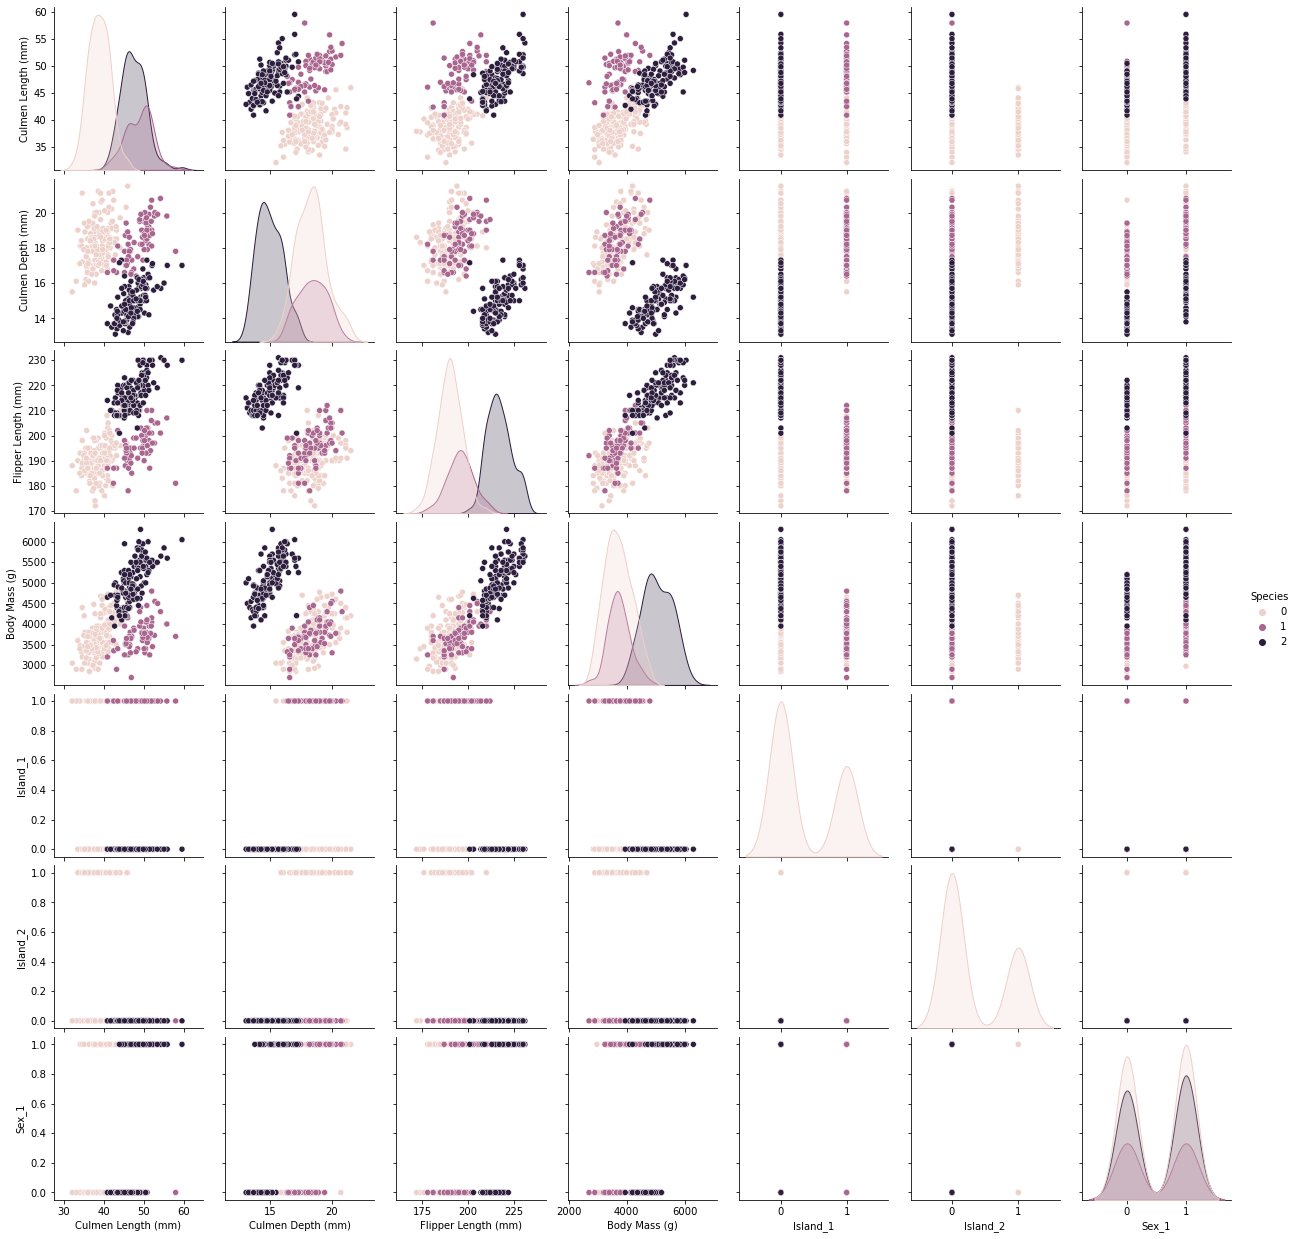

In [46]:
sns.pairplot(data=df,hue='Species')

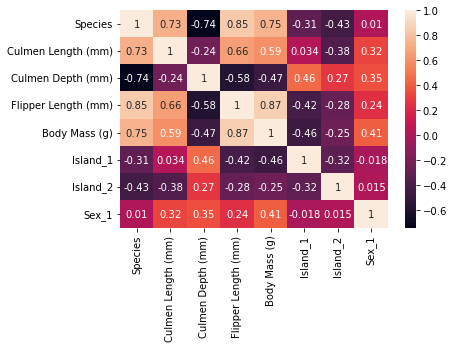

In [48]:
sns.heatmap(df.corr(),annot=True)

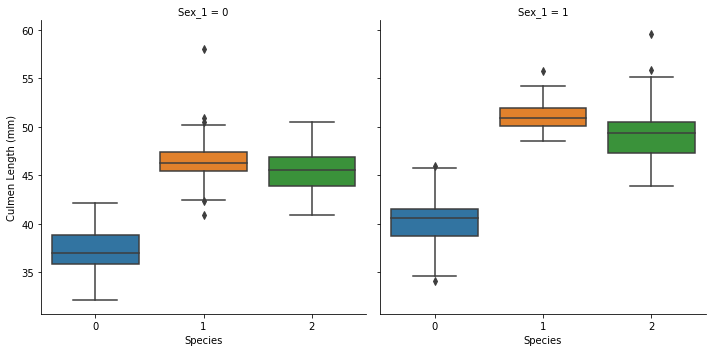

In [49]:
sns.catplot(data=df,x='Species',y='Culmen Length (mm)',kind='box',col='Sex_1')

In [50]:
# Split the data into x & y for Independent & dependent variables
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [51]:
x

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_1,Island_2,Sex_1
0,39.10000,18.70000,181.000000,4203.079179,0,1,1
1,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,40.30000,18.00000,200.932551,3250.000000,0,1,0
3,43.92193,17.15117,200.932551,4203.079179,0,1,1
4,36.70000,19.30000,193.000000,3450.000000,0,1,0
...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.932551,4203.079179,0,0,1
340,46.80000,14.30000,215.000000,4850.000000,0,0,0
341,50.40000,15.70000,222.000000,5750.000000,0,0,1
342,45.20000,14.80000,212.000000,5200.000000,0,0,0


In [52]:
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 344, dtype: int8

In [53]:
# Split the data into training & test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=12)

In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(258, 7)
(86, 7)
(258,)
(86,)


# Decision Tree Model 

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt_gini=DecisionTreeClassifier(criterion='gini')
dt_entropy=DecisionTreeClassifier(criterion='entropy')
dt_gini.fit(x_train,y_train)
dt_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [59]:
# predict the test dta by using decision tree model

y_pred_dt_gini_train=dt_gini.predict(x_train)
y_pred_dt_gini_test=dt_gini.predict(x_test)


y_pred_dt_entropy_train=dt_entropy.predict(x_train)
y_pred_dt_entropy_test=dt_entropy.predict(x_test)

In [60]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [71]:
print("Classification report for Gini Decision Tree Test: \n\n",classification_report(y_test,y_pred_dt_gini_test))
print("*"*100)
print("Classification report for entropy Decision Tree Test: \n\n",classification_report(y_test,y_pred_dt_entropy_test))


Classification report for Gini Decision Tree Test: 

               precision    recall  f1-score   support

           0       1.00      0.92      0.96        38
           1       0.92      1.00      0.96        11
           2       0.95      1.00      0.97        37

    accuracy                           0.97        86
   macro avg       0.96      0.97      0.96        86
weighted avg       0.97      0.97      0.96        86

****************************************************************************************************
Classification report for entropy Decision Tree Test: 

               precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.92      1.00      0.96        11
           2       0.97      1.00      0.99        37

    accuracy                           0.98        86
   macro avg       0.96      0.98      0.97        86
weighted avg       0.98      0.98      0.98        86



In [66]:
print("Confusion Matrix for Gini Decision Tree Test:\n ",confusion_matrix(y_test,y_pred_dt_gini_test))
print("*"*50)
print("Confusion Matrix for entropy Decision Tree Test:\n ",confusion_matrix(y_test,y_pred_dt_entropy_test))


Confusion Matrix for Gini Decision Tree Test:
  [[35  1  2]
 [ 0 11  0]
 [ 0  0 37]]
**************************************************
Confusion Matrix for entropy Decision Tree Test:
  [[36  1  1]
 [ 0 11  0]
 [ 0  0 37]]


In [69]:
print("Accuracy for Gini Decision Tree Test:\n ",accuracy_score(y_test,y_pred_dt_gini_test))
print("*"*50)
print("Accuracy for entropy Decision Tree Test:\n ",accuracy_score(y_test,y_pred_dt_entropy_test))


Accuracy for Gini Decision Tree Test:
  0.9651162790697675
**************************************************
Accuracy for entropy Decision Tree Test:
  0.9767441860465116


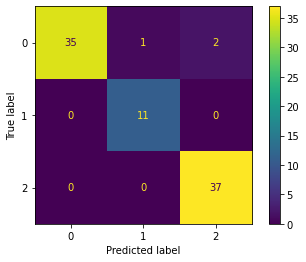

In [73]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_gini,x_test,y_test)
plt.show()

Accuracy:
    training=100%
    test=97%

In [78]:
dt_entropy.feature_importances_

array([0.31445908, 0.10396398, 0.50259246, 0.0099049 , 0.06907957,
       0.        , 0.        ])

In [77]:
# Check how much each feature is contributing for detection
pd.DataFrame(index=x.columns,data=dt_entropy.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Culmen Length (mm),0.314459
Culmen Depth (mm),0.103964
Flipper Length (mm),0.502592
Body Mass (g),0.009905
Island_1,0.069080
Island_2,0.000000
Sex_1,0.000000


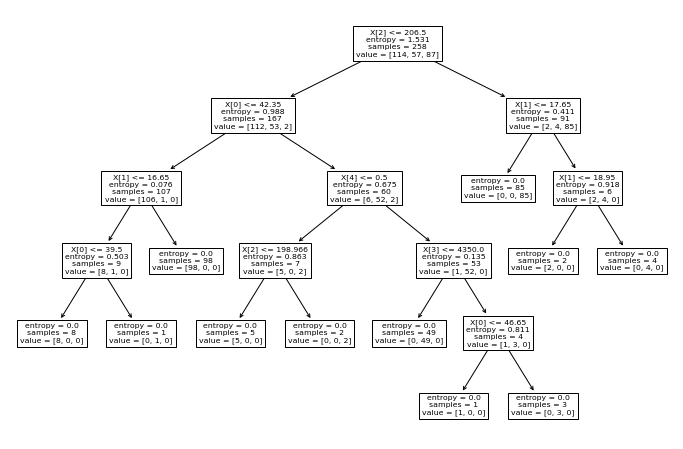

In [79]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt_entropy)
plt.show()

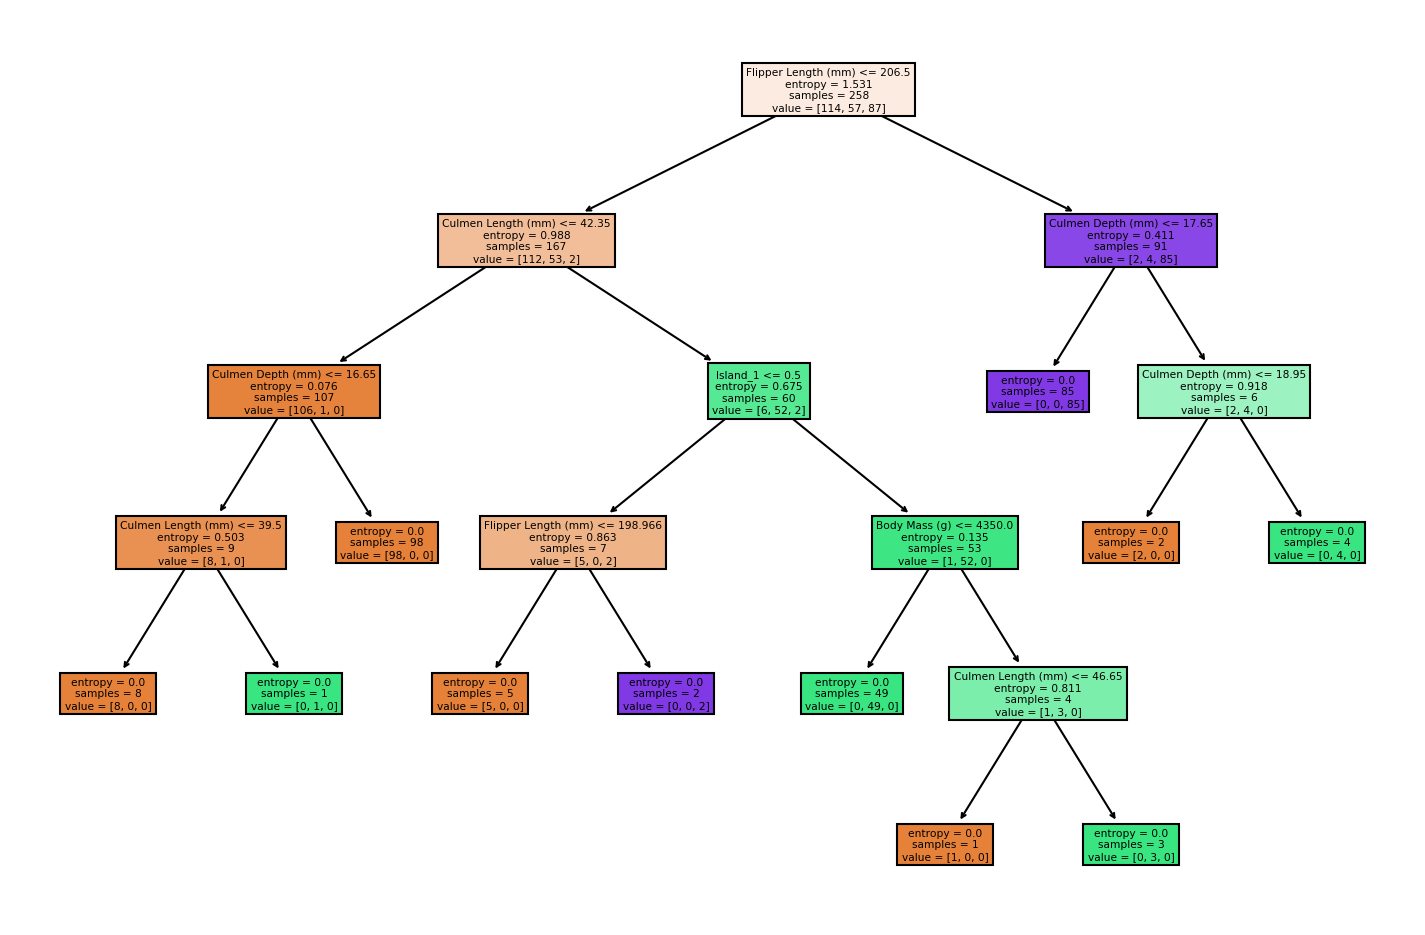

In [81]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt_entropy,filled=True,feature_names=x.columns)
plt.show()

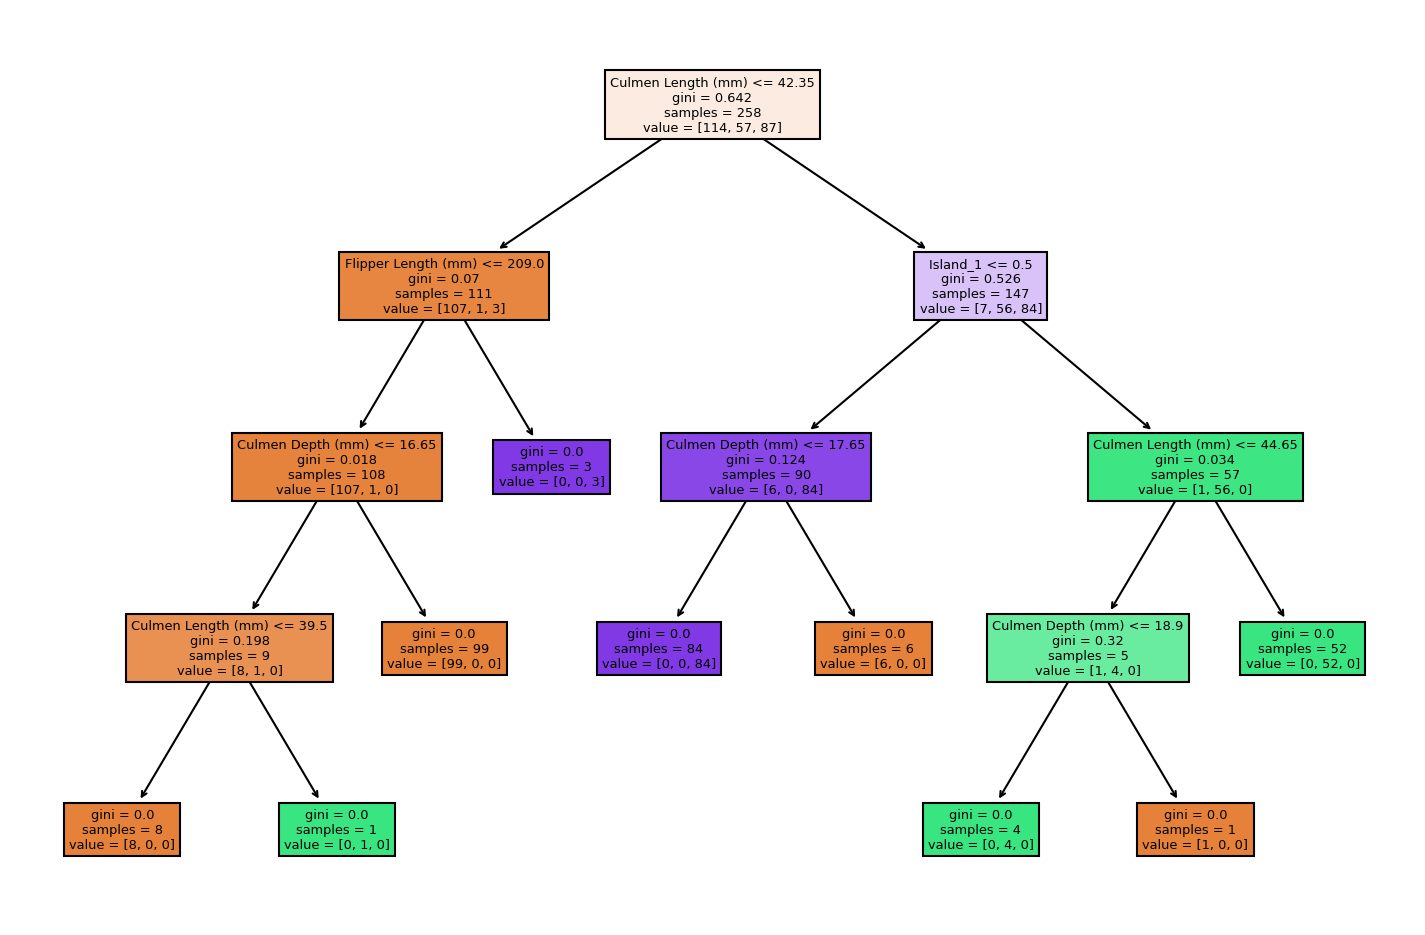

In [82]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt_gini,filled=True,feature_names=x.columns)
plt.show()

# Pruning

In [86]:
# user define function

def report_model(model):
    model_preds=model.predict(x_test)
    print("Classification Report: \n\n" ,classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=x.columns)

In [87]:
# Hyperparameters in DT

pruned_tree=DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.84      0.91        38
           1       0.92      1.00      0.96        11
           2       0.88      1.00      0.94        37

    accuracy                           0.93        86
   macro avg       0.93      0.95      0.94        86
weighted avg       0.94      0.93      0.93        86





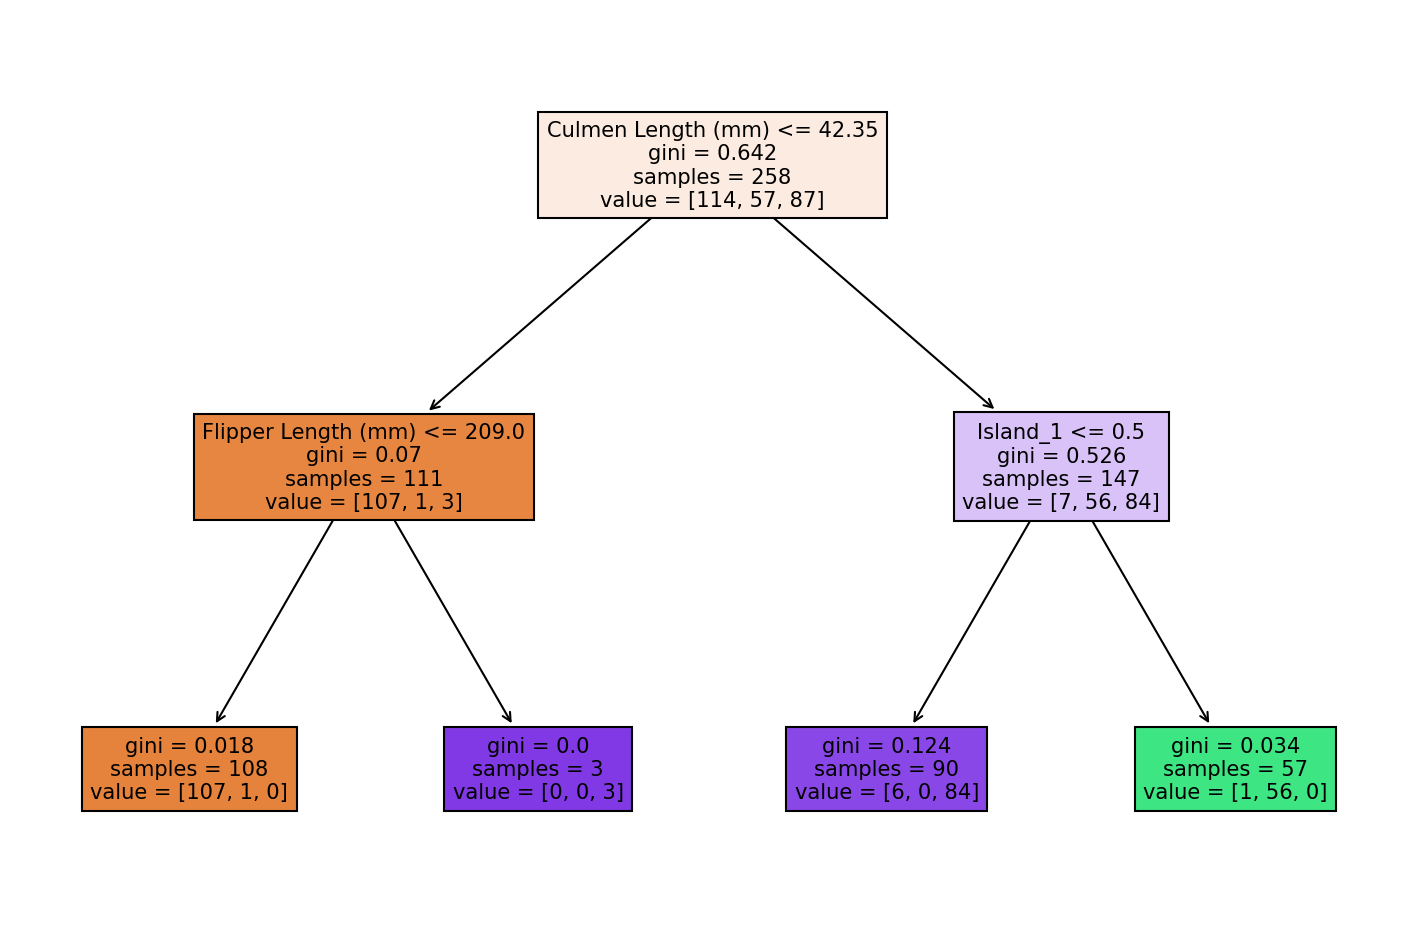

In [88]:
report_model(pruned_tree)

In [90]:
pruned_tree=DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.84      0.91        38
           1       0.92      1.00      0.96        11
           2       0.88      1.00      0.94        37

    accuracy                           0.93        86
   macro avg       0.93      0.95      0.94        86
weighted avg       0.94      0.93      0.93        86





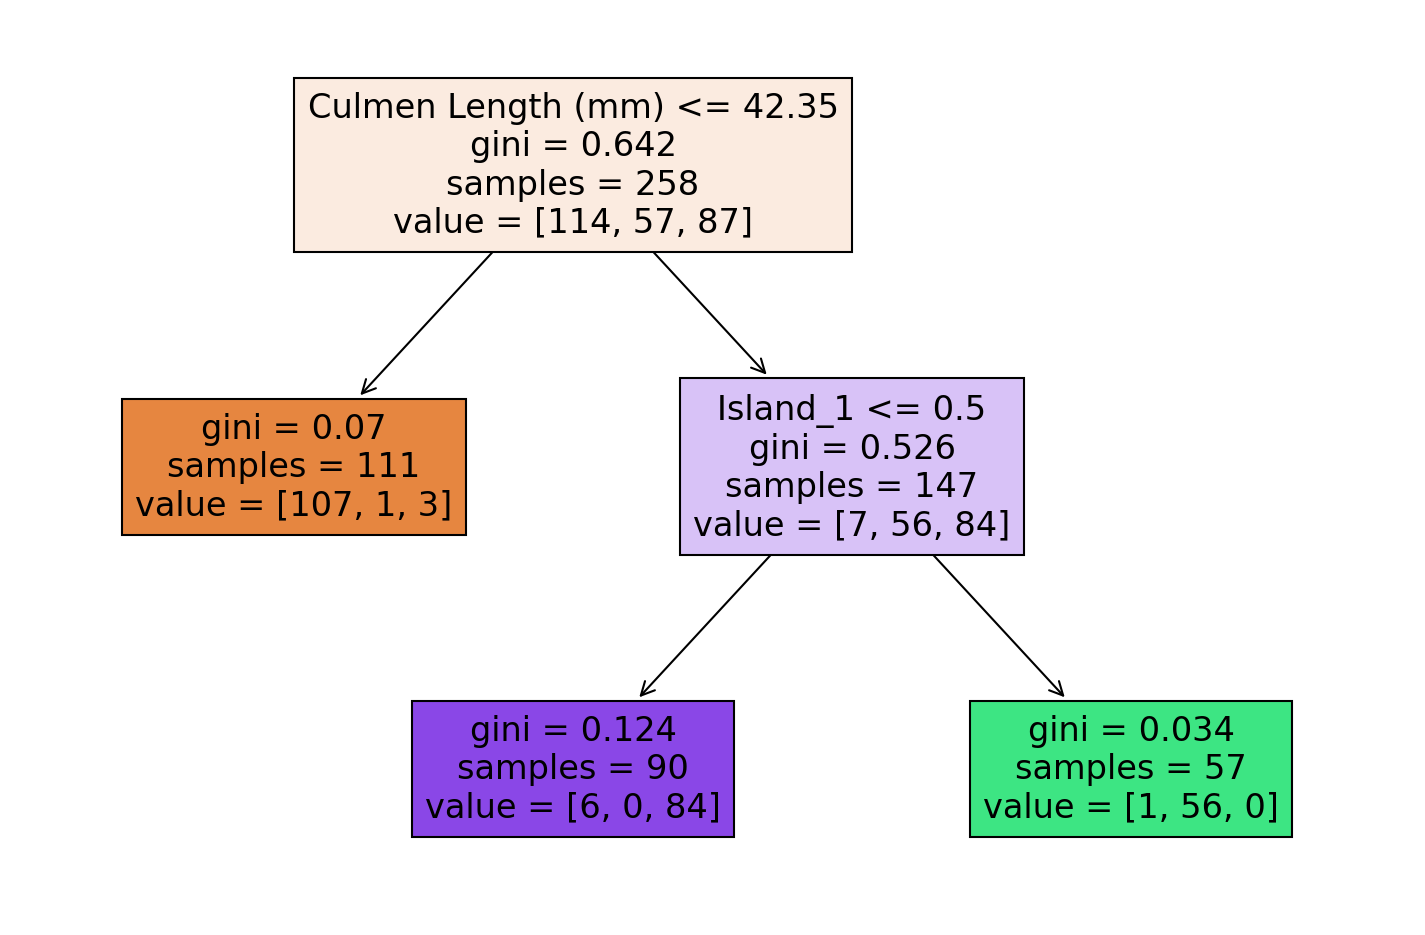

In [91]:
report_model(pruned_tree)